In [1]:
# Question 1

In [18]:
# Step 1. Import the necessary libraries
import pandas as pd

In [19]:
# Step 2. Import the dataset from this address
# Step 3. Assign it to a variable called users
users = pd.read_csv("https://raw.githubusercontent.com/justmarkham/DAT8/master/data/u.user", sep = "|",index_col="user_id")
users.head(10)

,age,gender,occupation,zip_code
user_id,,,,
1,24,M,technician,85711
2,53,F,other,94043
3,23,M,writer,32067
4,24,M,technician,43537
5,33,F,other,15213
6,42,M,executive,98101
7,57,M,administrator,91344
8,36,M,administrator,05201
9,29,M,student,01002


In [20]:
# Step 4. Discover what is the mean age per occupation
users.groupby('occupation', as_index=False).age.mean()

,occupation,age
0,administrator,38.746835
1,artist,31.392857
2,doctor,43.571429
3,educator,42.010526
4,engineer,36.388060
5,entertainment,29.222222
6,executive,38.718750
7,healthcare,41.562500
8,homemaker,32.571429
9,lawyer,36.750000


In [21]:
# Step 5. Discover the Male ratio per occupation and sort it from the most to the least
genders = users.groupby("occupation")["gender"].value_counts(normalize=True)*100
genders.head()

occupation     gender
administrator  M          54.430380
               F          45.569620
artist         M          53.571429
               F          46.428571
doctor         M         100.000000
Name: gender, dtype: float64

In [22]:
# Step 5. Discover the Male ratio per occupation and sort it from the most to the least
gendersn = pd.DataFrame(genders)
gendersn.rename(columns={"gender":"percent"}, inplace=True)
gendersn.head()

percent
occupation    gender            
administrator M        54.430380
              F        45.569620
artist        M        53.571429
              F        46.428571
doctor        M       100.000000

In [23]:
# Step 5. Discover the Male ratio per occupation and sort it from the most to the least
new_gen = pd.DataFrame(gendersn.reset_index(level=["occupation", "gender"]))
new_gen.head()

,occupation,gender,percent
0,administrator,M,54.430380
1,administrator,F,45.569620
2,artist,M,53.571429
3,artist,F,46.428571
4,doctor,M,100.000000


In [24]:
# Step 5. Discover the Male ratio per occupation and sort it from the most to the least
males = new_gen[new_gen["gender"] == "M"].sort_values(by="percent",ascending=False)
males

,occupation,gender,percent
4,doctor,M,100.000000
7,engineer,M,97.014925
37,technician,M,96.296296
29,retired,M,92.857143
27,programmer,M,90.909091
11,executive,M,90.625000
33,scientist,M,90.322581
9,entertainment,M,88.888889
17,lawyer,M,83.333333
31,salesman,M,75.000000


In [25]:
# Step 6. For each occupation, calculate the minimum and maximum ages
users.groupby('occupation', as_index=False).agg({'age': ['min', 'max']})

occupation age    
                  min max
0   administrator  21  70
1          artist  19  48
2          doctor  28  64
3        educator  23  63
4        engineer  22  70
5   entertainment  15  50
6       executive  22  69
7      healthcare  22  62
8       homemaker  20  50
9          lawyer  21  53
10      librarian  23  69
11      marketing  24  55
12           none  11  55
13          other  13  64
14     programmer  20  63
15        retired  51  73
16       salesman  18  66
17      scientist  23  55
18        student   7  42
19     technician  21  55
20         writer  18  60

In [26]:
# Step 7. For each combination of occupation and sex, calculate the mean age
users.groupby(['occupation','gender'], as_index=False).age.mean()

,occupation,gender,age
0,administrator,F,40.638889
1,administrator,M,37.162791
2,artist,F,30.307692
3,artist,M,32.333333
4,doctor,M,43.571429
5,educator,F,39.115385
6,educator,M,43.101449
7,engineer,F,29.500000
8,engineer,M,36.600000
9,entertainment,F,31.000000


In [27]:
# Step 8. For each occupation present the percentage of women and men
new_gen

,occupation,gender,percent
0,administrator,M,54.430380
1,administrator,F,45.569620
2,artist,M,53.571429
3,artist,F,46.428571
4,doctor,M,100.000000
5,educator,M,72.631579
6,educator,F,27.368421
7,engineer,M,97.014925
8,engineer,F,2.985075
9,entertainment,M,88.888889


In [11]:
# Question 2

In [28]:
# Step 1. Import the necessary libraries
import pandas as pd
import numpy as np

In [29]:
# Step 2. Import the dataset from this address
# Step 3. Assign it to a variable called euro12
euro12 = pd.read_csv('https://raw.githubusercontent.com/guipsamora/pandas_exercises/master/02_Filtering_%26_Sorting/Euro12/Euro_2012_stats_TEAM.csv')
euro12.head()

,Team,Goals,Shots on target,Shots off target,Shooting Accuracy,% Goals-to-shots,Total shots (inc. Blocked),Hit Woodwork,Penalty goals,Penalties not scored,...,Saves made,Saves-to-shots ratio,Fouls Won,Fouls Conceded,Offsides,Yellow Cards,Red Cards,Subs on,Subs off,Players Used
0,Croatia,4,13,12,51.9%,16.0%,32,0,0,0,...,13,81.3%,41,62,2,9,0,9,9,16
1,Czech Republic,4,13,18,41.9%,12.9%,39,0,0,0,...,9,60.1%,53,73,8,7,0,11,11,19
2,Denmark,4,10,10,50.0%,20.0%,27,1,0,0,...,10,66.7%,25,38,8,4,0,7,7,15
3,England,5,11,18,50.0%,17.2%,40,0,0,0,...,22,88.1%,43,45,6,5,0,11,11,16
4,France,3,22,24,37.9%,6.5%,65,1,0,0,...,6,54.6%,36,51,5,6,0,11,11,19


In [30]:
# Step 4. Select only the Goal column
euro12.Goals

0      4
1      4
2      4
3      5
4      3
5     10
6      5
7      6
8      2
9      2
10     6
11     1
12     5
13    12
14     5
15     2
Name: Goals, dtype: int64

In [31]:
# Step 5. How many team participated in the Euro2012
euro12.Team.nunique()

16

In [32]:
# Step 6. What is the number of columns in the dataset
len(euro12.columns)

35

In [33]:
# Step 7. View only the columns Team, Yellow Cards and Red Cards and assign them to a dataframe called discipline
discipline = euro12[['Team', 'Yellow Cards', 'Red Cards']]
discipline

,Team,Yellow Cards,Red Cards
0,Croatia,9,0
1,Czech Republic,7,0
2,Denmark,4,0
3,England,5,0
4,France,6,0
5,Germany,4,0
6,Greece,9,1
7,Italy,16,0
8,Netherlands,5,0
9,Poland,7,1


In [34]:
# Step 8. Sort the teams by Red Cards, then to Yellow Cards
RedCard = discipline.sort_values(by='Red Cards')
RedCard

,Team,Yellow Cards,Red Cards
0,Croatia,9,0
1,Czech Republic,7,0
2,Denmark,4,0
3,England,5,0
4,France,6,0
5,Germany,4,0
7,Italy,16,0
8,Netherlands,5,0
10,Portugal,12,0
12,Russia,6,0


In [35]:
# Step 8. Sort the teams by Yellow Cards
YellowCard = discipline.sort_values(by='Yellow Cards')
YellowCard

,Team,Yellow Cards,Red Cards
2,Denmark,4,0
5,Germany,4,0
3,England,5,0
8,Netherlands,5,0
15,Ukraine,5,0
4,France,6,0
11,Republic of Ireland,6,1
12,Russia,6,0
1,Czech Republic,7,0
9,Poland,7,1


In [36]:
# Step 9. Calculate the mean Yellow Cards given per Team
discipline['Yellow Cards'].mean()

7.4375

In [37]:
# Filter teams that scored more than 6 goals
euro12[euro12['Goals'] > 6]

,Team,Goals,Shots on target,Shots off target,Shooting Accuracy,% Goals-to-shots,Total shots (inc. Blocked),Hit Woodwork,Penalty goals,Penalties not scored,...,Saves made,Saves-to-shots ratio,Fouls Won,Fouls Conceded,Offsides,Yellow Cards,Red Cards,Subs on,Subs off,Players Used
5,Germany,10,32,32,47.8%,15.6%,80,2,1,0,...,10,62.6%,63,49,12,4,0,15,15,17
13,Spain,12,42,33,55.9%,16.0%,100,0,1,0,...,15,93.8%,102,83,19,11,0,17,17,18


In [38]:
# Step 11. Select the teams that start with G
euro12[euro12.Team.str.startswith('G')]

,Team,Goals,Shots on target,Shots off target,Shooting Accuracy,% Goals-to-shots,Total shots (inc. Blocked),Hit Woodwork,Penalty goals,Penalties not scored,...,Saves made,Saves-to-shots ratio,Fouls Won,Fouls Conceded,Offsides,Yellow Cards,Red Cards,Subs on,Subs off,Players Used
5,Germany,10,32,32,47.8%,15.6%,80,2,1,0,...,10,62.6%,63,49,12,4,0,15,15,17
6,Greece,5,8,18,30.7%,19.2%,32,1,1,1,...,13,65.1%,67,48,12,9,1,12,12,20


In [39]:
# Step 12. Select the first 7 columns
euro12.head(7)

,Team,Goals,Shots on target,Shots off target,Shooting Accuracy,% Goals-to-shots,Total shots (inc. Blocked),Hit Woodwork,Penalty goals,Penalties not scored,...,Saves made,Saves-to-shots ratio,Fouls Won,Fouls Conceded,Offsides,Yellow Cards,Red Cards,Subs on,Subs off,Players Used
0,Croatia,4,13,12,51.9%,16.0%,32,0,0,0,...,13,81.3%,41,62,2,9,0,9,9,16
1,Czech Republic,4,13,18,41.9%,12.9%,39,0,0,0,...,9,60.1%,53,73,8,7,0,11,11,19
2,Denmark,4,10,10,50.0%,20.0%,27,1,0,0,...,10,66.7%,25,38,8,4,0,7,7,15
3,England,5,11,18,50.0%,17.2%,40,0,0,0,...,22,88.1%,43,45,6,5,0,11,11,16
4,France,3,22,24,37.9%,6.5%,65,1,0,0,...,6,54.6%,36,51,5,6,0,11,11,19
5,Germany,10,32,32,47.8%,15.6%,80,2,1,0,...,10,62.6%,63,49,12,4,0,15,15,17
6,Greece,5,8,18,30.7%,19.2%,32,1,1,1,...,13,65.1%,67,48,12,9,1,12,12,20


In [40]:
# Step 13. Select all columns except the last 3
euro12.iloc[:, :-3]

,Team,Goals,Shots on target,Shots off target,Shooting Accuracy,% Goals-to-shots,Total shots (inc. Blocked),Hit Woodwork,Penalty goals,Penalties not scored,...,Clean Sheets,Blocks,Goals conceded,Saves made,Saves-to-shots ratio,Fouls Won,Fouls Conceded,Offsides,Yellow Cards,Red Cards
0,Croatia,4,13,12,51.9%,16.0%,32,0,0,0,...,0,10,3,13,81.3%,41,62,2,9,0
1,Czech Republic,4,13,18,41.9%,12.9%,39,0,0,0,...,1,10,6,9,60.1%,53,73,8,7,0
2,Denmark,4,10,10,50.0%,20.0%,27,1,0,0,...,1,10,5,10,66.7%,25,38,8,4,0
3,England,5,11,18,50.0%,17.2%,40,0,0,0,...,2,29,3,22,88.1%,43,45,6,5,0
4,France,3,22,24,37.9%,6.5%,65,1,0,0,...,1,7,5,6,54.6%,36,51,5,6,0
5,Germany,10,32,32,47.8%,15.6%,80,2,1,0,...,1,11,6,10,62.6%,63,49,12,4,0
6,Greece,5,8,18,30.7%,19.2%,32,1,1,1,...,1,23,7,13,65.1%,67,48,12,9,1
7,Italy,6,34,45,43.0%,7.5%,110,2,0,0,...,2,18,7,20,74.1%,101,89,16,16,0
8,Netherlands,2,12,36,25.0%,4.1%,60,2,0,0,...,0,9,5,12,70.6%,35,30,3,5,0
9,Poland,2,15,23,39.4%,5.2%,48,0,0,0,...,0,8,3,6,66.7%,48,56,3,7,1


In [41]:
# Step 14. Present only the Shooting Accuracy from England, Italy and Russia
euro12.loc[euro12.Team.isin(['England', 'Italy', 'Russia']), ['Team','Shooting Accuracy']]

,Team,Shooting Accuracy
3,England,50.0%
7,Italy,43.0%
12,Russia,22.5%


In [27]:
# Question 3

In [42]:
# Step 1. Import the necessary libraries
import pandas as pd
import numpy as np

In [43]:
# Step 2. Create 3 differents Series, each of length 100
# The first a random number from 1 to 4
Set1 = pd.Series(np.random.randint(1,5,100,dtype='l'))
print(Set1)

0     2
1     3
2     1
3     4
4     1
     ..
95    3
96    4
97    3
98    1
99    1
Length: 100, dtype: int64


In [44]:
# Step 2. Create 3 differents Series, each of length 100
# The second a random number from 1 to 3
Set2 = pd.Series(np.random.randint(1,4,100,dtype='l'))
print(Set2)

0     2
1     3
2     3
3     2
4     2
     ..
95    3
96    2
97    2
98    1
99    1
Length: 100, dtype: int64


In [45]:
# Step 2. Create 3 differents Series, each of length 100
# The third a random number from 10,000 to 30,000
Set3 = pd.Series(np.random.randint(10000,30001,100,dtype='l'))
print(Set3)

0     28714
1     11203
2     18542
3     28543
4     22462
      ...  
95    16318
96    10692
97    13568
98    28839
99    18698
Length: 100, dtype: int64


In [46]:
# Step 3. Create a DataFrame by joinning the Series by column
HouseDataFrame = pd.concat([Set1, Set2, Set3], axis=1)
HouseDataFrame.head()

,0,1,2
0,2,2,28714
1,3,3,11203
2,1,3,18542
3,4,2,28543
4,1,2,22462


In [47]:
# Step 4. Change the name of the columns to bedrs, bathrs, price_sqr_meter
HouseDataFrame.columns = ['bedrs','bathrs','price_sqr_meter']
HouseDataFrame.head()

,bedrs,bathrs,price_sqr_meter
0,2,2,28714
1,3,3,11203
2,1,3,18542
3,4,2,28543
4,1,2,22462


In [48]:
# Step 5. Create a one column DataFrame with the values of the 3 Series and assign it to 'bigcolumn'
bigcolumn = pd.concat([Set1, Set2, Set3], axis=0)
bigcolumn = bigcolumn.to_frame()
bigcolumn

,0
0,2
1,3
2,1
3,4
4,1
...,...
95,16318
96,10692
97,13568
98,28839


In [49]:
# Step 6. Ops it seems it is going only until index 99. Is it true?
len(bigcolumn) # True

300

In [72]:
# Step 7. Reindex the DataFrame so it goes from 0 to 299
bigcolumn.index = range(0, 300)
bigcolumn

,0
0,2
1,3
2,1
3,4
4,1
...,...
295,16318
296,10692
297,13568
298,28839


In [71]:
# Question 4

In [74]:
# Step 1. Import the necessary libraries
import pandas as pd
import datetime as dt

In [75]:
# Step 2. Import the dataset from the attached file wind.txt
# Step 3. Assign it to a variable called data and replace the first 3 columns by a proper datetime index.
data=pd.read_csv("/Users/iman/Desktop/PB3/Wind.txt",sep="\s+",parse_dates=[[0,1,2]])
data.head()

,Yr_Mo_Dy,RPT,VAL,ROS,KIL,SHA,BIR,DUB,CLA,MUL,CLO,BEL,MAL
0,2061-01-01,15.04,14.96,13.17,9.29,NaN,9.87,13.67,10.25,10.83,12.58,18.50,15.04
1,2061-01-02,14.71,NaN,10.83,6.50,12.62,7.67,11.50,10.04,9.79,9.67,17.54,13.83
2,2061-01-03,18.50,16.88,12.33,10.13,11.17,6.17,11.25,NaN,8.50,7.67,12.75,12.71
3,2061-01-04,10.58,6.63,11.75,4.58,4.54,2.88,8.63,1.79,5.83,5.88,5.46,10.88
4,2061-01-05,13.33,13.25,11.42,6.17,10.71,8.21,11.92,6.54,10.92,10.34,12.92,11.83


In [76]:
# Step 4. Year 2061? Do we really have data from this year? Create a function to fix it and apply it
def fixyear(x):
  year = x.year - 100 if x.year > 1989 else x.year
  return datetime.date(year, x.month, x.day)

In [77]:
# Step 5. Set the right dates as the index. Pay attention at the data type, it should be datetime64[ns]
data['Yr_Mo_Dy']=pd.to_datetime(data['Yr_Mo_Dy'])
data=data.set_index('Yr_Mo_Dy')
data.head()

,RPT,VAL,ROS,KIL,SHA,BIR,DUB,CLA,MUL,CLO,BEL,MAL
Yr_Mo_Dy,,,,,,,,,,,,
2061-01-01,15.04,14.96,13.17,9.29,NaN,9.87,13.67,10.25,10.83,12.58,18.50,15.04
2061-01-02,14.71,NaN,10.83,6.50,12.62,7.67,11.50,10.04,9.79,9.67,17.54,13.83
2061-01-03,18.50,16.88,12.33,10.13,11.17,6.17,11.25,NaN,8.50,7.67,12.75,12.71
2061-01-04,10.58,6.63,11.75,4.58,4.54,2.88,8.63,1.79,5.83,5.88,5.46,10.88
2061-01-05,13.33,13.25,11.42,6.17,10.71,8.21,11.92,6.54,10.92,10.34,12.92,11.83


In [78]:
# Step 6. Compute how many values are missing for each location over the entire record.They should be ignored in all calculations below.
data.isnull().sum()

RPT    6
VAL    3
ROS    2
KIL    5
SHA    2
BIR    0
DUB    3
CLA    2
MUL    3
CLO    1
BEL    0
MAL    4
dtype: int64

In [79]:
# Step 7. Compute how many non-missing values there are in total.
data.notnull().sum()

RPT    6568
VAL    6571
ROS    6572
KIL    6569
SHA    6572
BIR    6574
DUB    6571
CLA    6572
MUL    6571
CLO    6573
BEL    6574
MAL    6570
dtype: int64

In [80]:
# Step 8. Calculate the mean windspeeds of the windspeeds over all the locations and all the times.
data.sum().sum() / data.notna().sum().sum()

10.227883764282181

In [81]:
# Step 9. Create a DataFrame called loc_stats and calculate the min, max and mean windspeeds and standard deviations of the windspeeds at each location over all the days
loc_stats=pd.DataFrame()
loc_stats['min']=data.min()
loc_stats['max']=data.max()
loc_stats['mean']=data.mean()
loc_stats['std']=data.std()
loc_stats

,min,max,mean,std
RPT,0.67,35.80,12.362987,5.618413
VAL,0.21,33.37,10.644314,5.267356
ROS,1.50,33.84,11.660526,5.008450
KIL,0.00,28.46,6.306468,3.605811
SHA,0.13,37.54,10.455834,4.936125
BIR,0.00,26.16,7.092254,3.968683
DUB,0.00,30.37,9.797343,4.977555
CLA,0.00,31.08,8.495053,4.499449
MUL,0.00,25.88,8.493590,4.166872
CLO,0.04,28.21,8.707332,4.503954


In [82]:
# Step 10. Create a DataFrame called day_stats and calculate the min, max and mean windspeed and standard deviations of the windspeeds across all the locations at each day.
day_stats=pd.DataFrame()
day_stats['min']=data.min(axis=1)
day_stats['max']=data.max(axis=1)
day_stats['mean']=data.mean(axis=1)
day_stats['std']=data.std(axis=1)
day_stats

,min,max,mean,std
Yr_Mo_Dy,,,,
2061-01-01,9.29,18.50,13.018182,2.808875
2061-01-02,6.50,17.54,11.336364,3.188994
2061-01-03,6.17,18.50,11.641818,3.681912
2061-01-04,1.79,11.75,6.619167,3.198126
2061-01-05,6.17,13.33,10.630000,2.445356
...,...,...,...,...
1978-12-27,8.08,40.08,16.708333,7.868076
1978-12-28,5.00,41.46,15.150000,9.687857
1978-12-29,8.71,29.58,14.890000,5.756836


In [83]:
# Step 11. Find the average windspeed in January for each location.
data.loc[data.index.month == 1].mean()

RPT    14.847325
VAL    12.914560
ROS    13.299624
KIL     7.199498
SHA    11.667734
BIR     8.054839
DUB    11.819355
CLA     9.512047
MUL     9.543208
CLO    10.053566
BEL    14.550520
MAL    18.028763
dtype: float64

In [84]:
# Step 12. Downsample the record to a yearly frequency for each location.
data.groupby(data.index.to_period('A')).mean() 

,RPT,VAL,ROS,KIL,SHA,BIR,DUB,CLA,MUL,CLO,BEL,MAL
Yr_Mo_Dy,,,,,,,,,,,,
1972,12.463962,10.561311,12.058333,5.929699,9.430410,6.358825,9.704508,7.680792,8.357295,7.515273,12.727377,15.028716
1973,11.828466,10.680493,10.680493,5.547863,9.640877,6.548740,8.482110,7.614274,8.245534,7.812411,12.169699,15.441096
1974,13.643096,11.811781,12.336356,6.427041,11.110986,6.809781,10.084603,9.896986,9.331753,8.736356,13.252959,16.947671
1975,12.008575,10.293836,11.564712,5.269096,9.190082,5.668521,8.562603,7.843836,8.797945,7.382822,12.631671,15.307863
1976,11.737842,10.203115,10.761230,5.109426,8.846339,6.311038,9.149126,7.146202,8.883716,7.883087,12.332377,15.471448
1977,13.099616,11.144493,12.627836,6.073945,10.003836,8.586438,11.523205,8.378384,9.098192,8.821616,13.459068,16.590849
1978,12.504356,11.044274,11.380000,6.082356,10.167233,7.650658,9.489342,8.800466,9.089753,8.301699,12.967397,16.771370
2061,12.299583,10.351796,11.362369,6.958227,10.881763,7.729726,9.733923,8.858788,8.647652,9.835577,13.502795,13.680773
2062,12.246923,10.110438,11.732712,6.960440,10.657918,7.393068,11.020712,8.793753,8.316822,9.676247,12.930685,14.323956


In [85]:
# Step 13. Downsample the record to a monthly frequency for each location.
data.groupby(data.index.to_period('M')).mean()

,RPT,VAL,ROS,KIL,SHA,BIR,DUB,CLA,MUL,CLO,BEL,MAL
Yr_Mo_Dy,,,,,,,,,,,,
1972-01,14.383871,11.848387,13.732258,5.925161,10.823226,7.291290,11.287097,6.733548,9.109355,8.728387,12.170645,17.598710
1972-02,14.046207,10.814483,12.960000,6.347586,10.918621,7.245172,10.276552,7.311379,8.710345,8.854483,13.124483,17.257931
1972-03,12.900000,10.505161,13.220323,6.949032,10.996452,6.949677,9.937742,7.025806,8.897742,7.835484,11.522581,15.282581
1972-04,13.675333,10.638000,13.237667,7.232667,11.253667,7.036333,11.350667,9.060333,9.842333,8.569000,12.967667,14.812000
1972-05,15.963226,12.636129,14.579355,7.974839,13.021290,7.560968,10.773226,10.083548,9.695806,10.083548,15.366452,16.471935
...,...,...,...,...,...,...,...,...,...,...,...,...
2071-08,9.783226,6.991935,10.227097,4.540968,8.978065,4.797742,7.450645,5.460645,6.866452,5.244194,10.087742,11.500968
2071-09,8.365000,6.512667,7.704333,3.470667,7.676667,5.462667,6.003000,4.437333,5.385667,4.748667,9.232333,12.311333
2071-10,12.926129,11.106452,12.467419,5.778065,11.305161,8.562903,10.073226,8.091935,9.121935,9.571290,15.617097,17.890645


In [86]:
# Step 14. Downsample the record to a weekly frequency for each location.
data.groupby(data.index.to_period('W')).mean()

,RPT,VAL,ROS,KIL,SHA,BIR,DUB,CLA,MUL,CLO,BEL,MAL
Yr_Mo_Dy,,,,,,,,,,,,
1971-12-27/1972-01-02,9.125000,2.545000,13.270000,4.375000,4.980000,2.625000,9.520000,3.000000,6.915000,4.665000,5.230000,13.500000
1972-01-03/1972-01-09,11.792857,7.761429,11.124286,4.212857,7.742857,5.500000,7.940000,4.924286,6.237143,6.247143,7.460000,13.962857
1972-01-10/1972-01-16,17.061429,14.494286,16.241429,7.025714,12.231429,8.808571,12.767143,8.017143,10.114286,10.811429,13.950000,18.792857
1972-01-17/1972-01-23,13.291429,13.375714,10.905714,5.304286,11.874286,8.457143,11.925714,7.724286,10.322857,9.744286,14.862857,19.944286
1972-01-24/1972-01-30,15.732857,12.928571,16.025714,7.304286,11.665714,6.702857,12.847143,6.250000,10.048571,9.054286,13.215714,18.212857
...,...,...,...,...,...,...,...,...,...,...,...,...
2071-11-30/2071-12-06,9.432857,8.880000,7.755714,2.404286,7.097143,4.291429,7.250000,4.432857,5.480000,5.172857,12.898571,15.498571
2071-12-07/2071-12-13,9.471429,6.048571,8.330000,3.791429,7.065714,5.614286,10.671429,5.428571,7.917143,8.672857,14.325714,19.862857
2071-12-14/2071-12-20,21.120000,18.934286,17.741429,10.798571,16.771429,13.542857,15.677143,14.548571,14.622857,16.494286,26.552857,27.332857


In [87]:
# Step 15. Calculate the min, max and mean windspeeds and standard deviations of the windspeeds across all locations for each week (assume that the first week starts on January 2 1961) for the first 52 weeks.
weekly = data.resample('W').agg(['min','max','mean','std'])
weekly.loc[weekly.index[1:53], "RPT":"MAL"] .head(10)

RPT                                VAL                    \
              min    max       mean        std   min    max       mean   
Yr_Mo_Dy                                                                 
1972-01-09   6.83  17.00  11.792857   3.557915  0.67  13.92   7.761429   
1972-01-16   8.63  23.96  17.061429   6.596682  4.58  20.62  14.494286   
1972-01-23   7.21  20.41  13.291429   5.470854  7.29  18.71  13.375714   
1972-01-30  11.25  26.42  15.732857   6.172797  7.25  19.12  12.928571   
1972-02-06   2.79  33.84  15.817143  10.514780  2.29  26.38  13.721429   
1972-02-13   5.09  18.96  13.934286   4.676989  5.66  14.21  11.117143   
1972-02-20   6.58  24.37  14.291429   6.460375  5.00  23.79  11.862857   
1972-02-27   6.17  25.62  13.212857   6.737989  1.38  14.12   8.238571   
1972-03-05   6.21  26.30  15.860000   6.314576  6.21  22.29  12.588571   
1972-03-12   6.29  24.71  15.411429   6.920769  6.38  19.33  10.962857   

                        ROS         ...        CLO              BEL         \
                 std    min    max  ...       mean       std    min    max   
Yr_Mo_Dy                            ...                                      
1972-01-09  5.198956   5.41  19.12  ...   6.247143  5.950223   2.21  14.67   
1972-01-16  5.885858   9.29  20.17  ...  10.811429  3.932173   4.50  18.08   
1972-01-23  4.094089   6.38  18.46  ...   9.744286  3.324750  10.83  22.29   
1972-01-30  4.349940  10.34  23.29  ...   9.054286  4.907161   7.25  19.25   
1972-02-06  8.639555   3.21  28.16  ...  10.208571  6.796010   2.08  24.21   
1972-02-13  3.214341   7.08  15.00  ...   8.221429  3.642890   5.09  17.88   
1972-02-20  6.478749   6.21  22.00  ...   9.581429  6.014958   5.00  32.08   
1972-02-27  4.717020   7.62  17.54  ...   7.421429  4.983558   2.33  16.66   
1972-03-05  5.352026   6.67  19.04  ...  10.297143  5.310373   7.83  23.33   
1972-03-12  4.634148   6.58  32.75  ...   8.827143  3.342034   5.17  17.79   

                                   MAL                              
                 mean       std    min    max       mean       std  
Yr_Mo_Dy                                                            
1972-01-09   7.460000  4.518200   5.88  28.33  13.962857  9.146709  
1972-01-16  13.950000  4.780805   8.92  23.09  18.792857  4.906675  
1972-01-23  14.862857  4.297331  14.75  23.00  19.944286  3.197868  
1972-01-30  13.215714  4.604186  10.83  33.25  18.212857  7.499233  
1972-02-06  14.571429  8.352082   6.71  33.63  21.477143  9.270368  
1972-02-13  13.972857  4.512999   9.71  20.58  16.388571  3.904350  
1972-02-20  14.351429  8.746480  10.58  37.04  18.078571  9.402162  
1972-02-27   9.214286  5.139419   5.09  22.83  13.524286  6.413769  
1972-03-05  15.697143  5.548476  11.25  27.54  18.837143  5.678558  
1972-03-12  10.948571  4.716600   9.21  28.79  16.708571  6.465703  

[10 rows x 48 columns]

In [ ]:
# Question 5

In [88]:
# Step 1. Import the necessary libraries
import pandas as pd
import numpy as np

In [89]:
# Step 2. Import the dataset from this address.
# Step 3. Assign it to a variable called chipo.
url = "https://raw.githubusercontent.com/justmarkham/DAT8/master/data/chipotle.tsv"  
chipo = pd.read_csv(url, sep = '\t')

In [90]:
# Step 4. See the first 10 entries
chipo.head(10)

,order_id,quantity,item_name,choice_description,item_price
0,1,1,Chips and Fresh Tomato Salsa,NaN,$2.39
1,1,1,Izze,[Clementine],$3.39
2,1,1,Nantucket Nectar,[Apple],$3.39
3,1,1,Chips and Tomatillo-Green Chili Salsa,NaN,$2.39
4,2,2,Chicken Bowl,"[Tomatillo-Red Chili Salsa (Hot), [Black Beans...",$16.98
5,3,1,Chicken Bowl,"[Fresh Tomato Salsa (Mild), [Rice, Cheese, Sou...",$10.98
6,3,1,Side of Chips,NaN,$1.69
7,4,1,Steak Burrito,"[Tomatillo Red Chili Salsa, [Fajita Vegetables...",$11.75
8,4,1,Steak Soft Tacos,"[Tomatillo Green Chili Salsa, [Pinto Beans, Ch...",$9.25
9,5,1,Steak Burrito,"[Fresh Tomato Salsa, [Rice, Black Beans, Pinto...",$9.25


In [91]:
# Step 5. What is the number of observations in the dataset?
len(chipo)

4622

In [92]:
# Step 6. What is the number of columns in the dataset?
len(chipo.columns)

5

In [93]:
# Step 7. Print the name of all the columns.
chipo.columns

Index(['order_id', 'quantity', 'item_name', 'choice_description',
       'item_price'],
      dtype='object')

In [94]:
# Step 8. How is the dataset indexed?
chipo.index

RangeIndex(start=0, stop=4622, step=1)

In [95]:
# Step 9. Which was the most-ordered item?
chipo.groupby(['item_name']).quantity.sum().sort_values(ascending = False).index[0]

'Chicken Bowl'

In [96]:
# Step 10. For the most-ordered item, how many items were ordered?
chipo.groupby(['item_name']).quantity.sum().sort_values(ascending = False).values[0]

761

In [97]:
# Step 11. What was the most ordered item in the choice_description column?
chipo.groupby(['choice_description']).quantity.sum().sort_values(ascending = False).index[0]

'[Diet Coke]'

In [98]:
# Step 12. How many items were orderd in total?
chipo.quantity.sum()

4972

In [99]:
# Step 13 Turn the item price into a float
def num_float(x):
    return float(x[1:-1])

In [100]:
# # Step 13 Check the item price type
chipo.item_price.dtype

dtype('O')

In [101]:
# Step 13 Create a lambda function and change the type of item price
chipo.item_price = chipo.item_price.apply(lambda x: float(x[1:]))

In [102]:
# Step 13 Check the item price type
chipo.item_price

0        2.39
1        3.39
2        3.39
3        2.39
4       16.98
        ...  
4617    11.75
4618    11.75
4619    11.25
4620     8.75
4621     8.75
Name: item_price, Length: 4622, dtype: float64

In [103]:
# Step 14. How much was the revenue for the period in the dataset?
chipo['revenue'] = chipo['quantity']*chipo.item_price
TotalRevenue = chipo.revenue.sum()
TotalRevenue

39237.02

In [104]:
# Step 15. How many orders were made in the period?
TotalOrder = chipo.order_id.nunique()
TotalOrder

1834

In [105]:
# Step 16. What is the average revenue amount per order?
chipo.groupby(by=['order_id']).sum().mean()['revenue']

21.394231188658654

In [106]:
# Step 17. How many different items are sold?
chipo.item_name.nunique()

50

In [ ]:
# Question 6

In [107]:
import pandas as pd
import matplotlib.pyplot as plt

In [108]:
data = pd.read_csv("/Users/iman/Desktop/PB3/us-marriages-divorces-1867-2014.csv")

<Figure size 432x288 with 0 Axes>

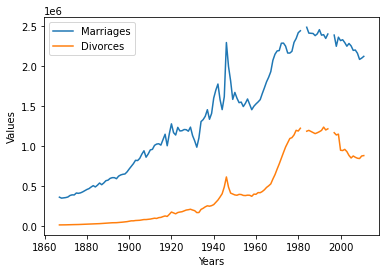

In [109]:
plt.figure()
data.plot('Year',y=['Marriages','Divorces'])
plt.ylabel('Values')
plt.xlabel('Years')
plt.show()

In [ ]:
# Question 7

In [110]:
data_bw_3_years = data[data['Year'].apply(lambda x: x in [1900, 1950, 2000])]
marriages = data_bw_3_years['Marriages_per_1000'].values
divorces = data_bw_3_years['Divorces_per_1000'].values

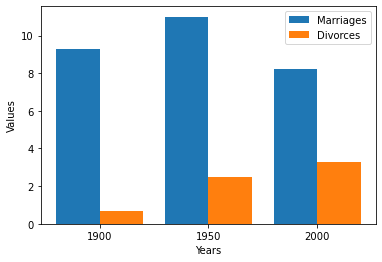

In [111]:
X = ['1900', '1950', '2000']
X_axis = np.arange(len(X))
plt.bar(X_axis - 0.2, marriages, 0.4, label = 'Marriages')
plt.bar(X_axis + 0.2, divorces, 0.4, label = 'Divorces')
plt.xticks(X_axis, X)
plt.xlabel("Years")
plt.ylabel("Values")
plt.legend()

In [ ]:
# Question 8

In [157]:
import pandas as pd

In [158]:
data = pd.read_csv("/Users/iman/Desktop/PB3/actor_kill_counts.csv")
data.head()

,Actor,Count
0,Arnold Schwarzenegger,369
1,Chow Yun-Fat,295
2,Clint Eastwood,207
3,Clive Owen,194
4,Dolph Lundgren,239


In [159]:
data = data.sort_values('Count', ascending = True)
actor_names = data['Actor'].values
kill_counts = data['Count'].values

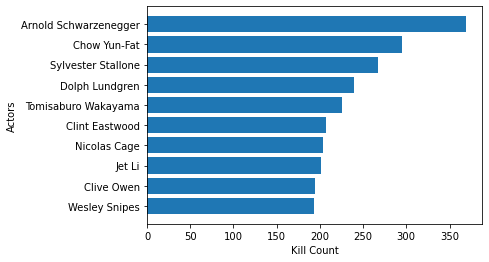

In [163]:
plt.barh(actor_names, kill_counts)
plt.ylabel("Actors")
plt.xlabel("Kill Count")
plt.show()

In [ ]:
# Question 9 

In [136]:
import pandas as pd
import matplotlib.pyplot as plt

In [143]:
data = pd.read_csv("/Users/iman/Desktop/PB3/roman-emperor-reigns.csv")
data.head()

,Emperor,Length_of_Reign,Cause_of_Death
0,Augustus,40.58,Possibly assassinated
1,Tiberius,22.50,Possibly assassinated
2,Caligula,4.83,Assassinated
3,Claudius,13.75,Possibly assassinated
4,Nero,13.67,Suicide


In [148]:
killed_Emperors = data[data['Cause_of_Death'].apply(lambda x: 'assassinated' in x.lower())]
killed_Emperors.head()

,Emperor,Length_of_Reign,Cause_of_Death
0,Augustus,40.58,Possibly assassinated
1,Tiberius,22.50,Possibly assassinated
2,Caligula,4.83,Assassinated
3,Claudius,13.75,Possibly assassinated
5,Galba,0.58,Assassinated


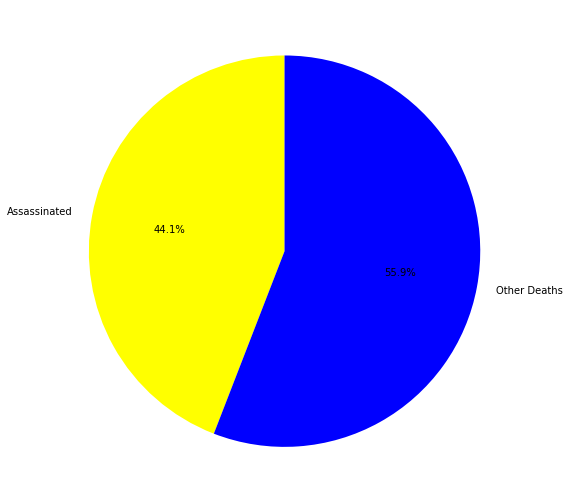

In [149]:
fig = plt.figure(figsize =(10, 9))
colors=['yellow', 'blue']
plt.pie([len(killed_Emperors),len(data) - len(killed_Emperors)], labels = ['Assassinated', 'Other Deaths'],  colors=colors, startangle=90, autopct='%1.1f%%')
plt.show()

In [ ]:
# Question 10

In [118]:
import seaborn as sns

In [119]:
Arcade_revenue_cs_Phd = pd.read_csv("/Users/iman/Desktop/PB3/arcade-revenue-vs-cs-doctorates.csv")
Arcade_revenue_cs_Phd.head()

,Year,Total Arcade Revenue (billions),Computer Science Doctorates Awarded (US)
0,2000,1.196,861
1,2001,1.176,830
2,2002,1.269,809
3,2003,1.240,867
4,2004,1.307,948


In [120]:
arcade_revenue = Arcade_revenue_cs_Phd ['Total Arcade Revenue (billions)'].values
cs_Phd_awardes = Arcade_revenue_cs_Phd ['Computer Science Doctorates Awarded (US)'].values

<AxesSubplot:xlabel='Computer Science Doctorates Awarded (US)', ylabel='Total Arcade Revenue (billions)'>

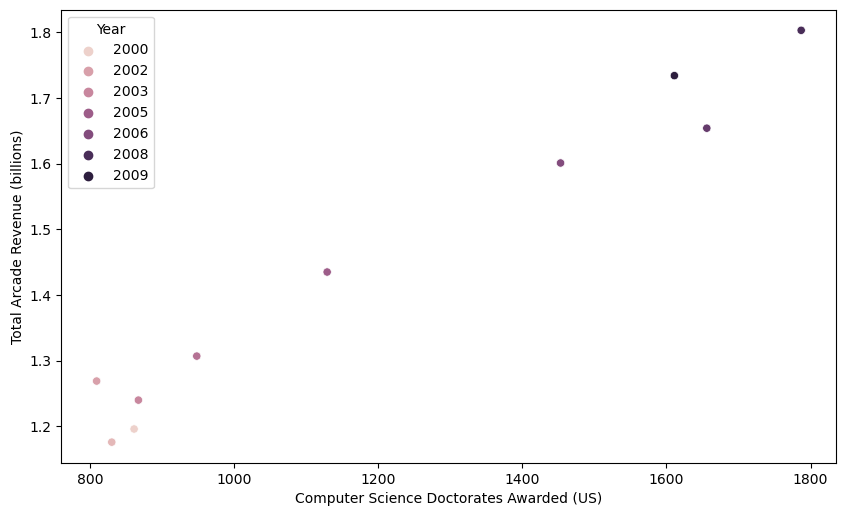

In [121]:
fig, ax=plt.subplots(figsize=(10, 6), dpi=100)
sns.scatterplot(x='Computer Science Doctorates Awarded (US)',y='Total Arcade Revenue (billions)', hue= 'Year', data=Arcade_revenue_cs_Phd)